# 1. Завантажуємо дані

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
df = pd.read_csv("ikea.csv", index_col=0).drop_duplicates()
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


# 2. EDA

Оцінимо заповненість колонок значеннями.

In [3]:
df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


Усього 3694 значення. Тільки габарити товарів мають пусті значення.

In [5]:
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

Видалимо неінформативні колонки.

In [86]:
df = df.drop(['item_id', 'link'], axis=1)
df.columns

Index(['name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width'],
      dtype='object')

In [7]:
df[df.category == "Bar furniture"].describe()

,price,depth,height,width
count,47.000000,27.000000,35.000000,37.000000
mean,679.553191,46.925926,97.571429,52.945946
std,604.600148,5.703750,14.727497,14.933084
min,40.000000,36.000000,43.000000,36.000000
25%,245.000000,44.000000,97.000000,40.000000
50%,445.000000,47.000000,102.000000,48.000000
75%,895.500000,51.000000,104.500000,70.000000
max,2375.000000,60.000000,114.000000,80.000000


In [8]:
df[df.category == "Beds"].describe()

,price,depth,height,width
count,208.000000,83.000000,157.000000,185.000000
mean,1647.432692,81.734940,82.847134,141.983784
std,1807.961186,34.859678,44.263657,65.392500
min,30.000000,7.000000,2.000000,7.000000
25%,513.750000,54.000000,45.000000,91.000000
50%,1093.500000,88.000000,84.000000,140.000000
75%,2003.250000,98.000000,102.000000,180.000000
max,9585.000000,164.000000,195.000000,387.000000


In [9]:
df[df.category == "Chairs"].describe()

,price,depth,height,width
count,481.000000,278.000000,290.000000,389.000000
mean,1048.932640,60.676259,76.837931,66.156812
std,1304.617801,25.100870,19.984370,23.074031
min,11.400000,21.000000,13.000000,4.000000
25%,175.000000,47.000000,72.000000,48.000000
50%,425.000000,53.500000,77.000000,67.000000
75%,1495.000000,68.000000,90.000000,80.000000
max,6965.000000,164.000000,173.000000,159.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

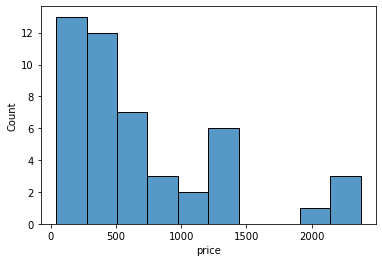

In [10]:
df_bar_furniture = df[df.category == "Bar furniture"]
sns.histplot(df_bar_furniture.price, bins=10)

<AxesSubplot:xlabel='price', ylabel='Count'>

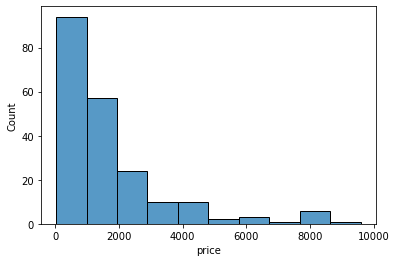

In [11]:
df_bar_furniture = df[df.category == "Beds"]
sns.histplot(df_bar_furniture.price, bins=10)

<AxesSubplot:xlabel='price', ylabel='Count'>

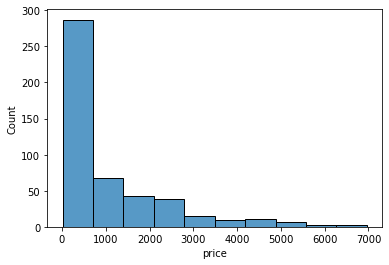

In [12]:
df_bar_furniture = df[df.category == "Chairs"]
sns.histplot(df_bar_furniture.price, bins=10)

Створимо синтетичну колонку 'volume', та проаналізуємо вплив цієї колонки на ціну

In [87]:
df['volume'] = df['height'] * df['width'] * df['depth'] / 1000000
df.head()

,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,volume
0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,NaN
1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,NaN
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,NaN
3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,0.30000
4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0.19092


Створимо проміжний датафрейм для аналізу та візуалізації, вилучивши рядки з порожніми значеннями

In [66]:
df_0 = df.dropna() 
df_0.count()

name                 1899
category             1899
price                1899
old_price            1899
sellable_online      1899
other_colors         1899
short_description    1899
designer             1899
depth                1899
height               1899
width                1899
volume               1899
dtype: int64

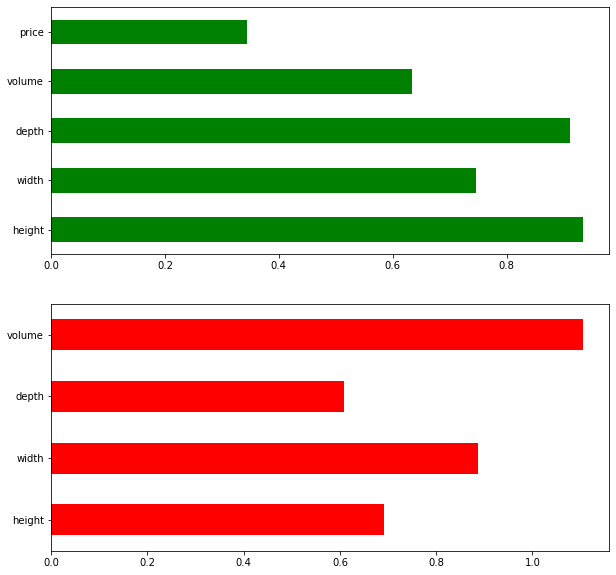

In [67]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression 

_, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

df_X = df_0[['height', 'width', 'depth', 'volume', 'price']]
df_y = df_0['category']

importance_0 = mutual_info_classif(df_X, df_y)
feature_importances = pd.Series(importance_0, df_X.columns)
feature_importances.plot(kind='barh', color='green',ax=ax1)

df_X_1 = df_0[['height', 'width', 'depth', 'volume']]
df_y_1 = df_0['price']

importance_1 = mutual_info_regression(df_X_1, df_y_1)
feature_importances_1 = pd.Series(importance_1, df_X_1.columns)
feature_importances_1.plot(kind='barh', color='red',ax=ax2)

plt.show()

Як видно з діаграм вище, то розміри виробу визначають категорію товару набагато краще ніж ціна. А ціну характеризують більшою мірою об'єм виробу та ширина.

In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3)
model.fit(df_X_1, df_y_1)
importances = model.feature_importances_
print(importances)

[0.10087871 0.0814096  0.06055801 0.75715368]


Як видно з отриманих результатів, найбільший вплив на ціну має об'єм.

Побудуємо гістограми для деяких параметрів.

price


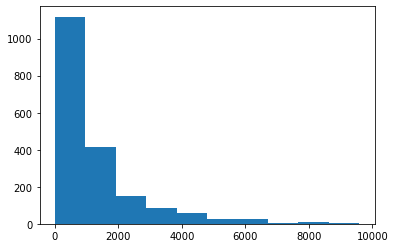

depth


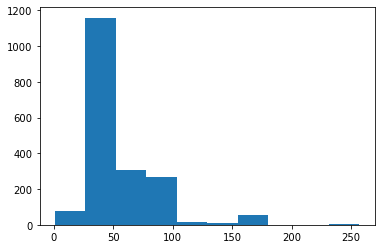

height


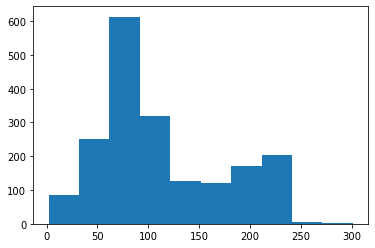

width


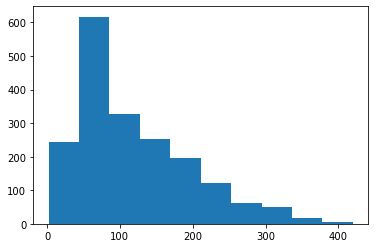

volume


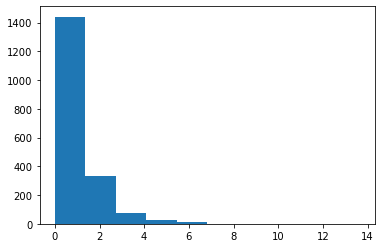

In [69]:
for col in ['price', 'depth', 'height', 'width', 'volume']:
    print(col)
    plt.hist(df_0[col])
    plt.show()

За гістограмами можна припустити, що ці величини мають логнормальний розподіл.

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

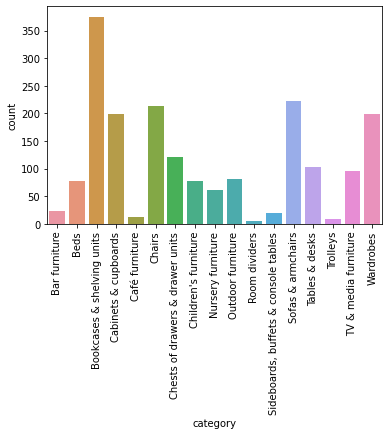

In [70]:
#гістограма для категорій
sns.countplot(x=df_0['category']).set_xticklabels(df_0['category'].unique(), rotation=90)

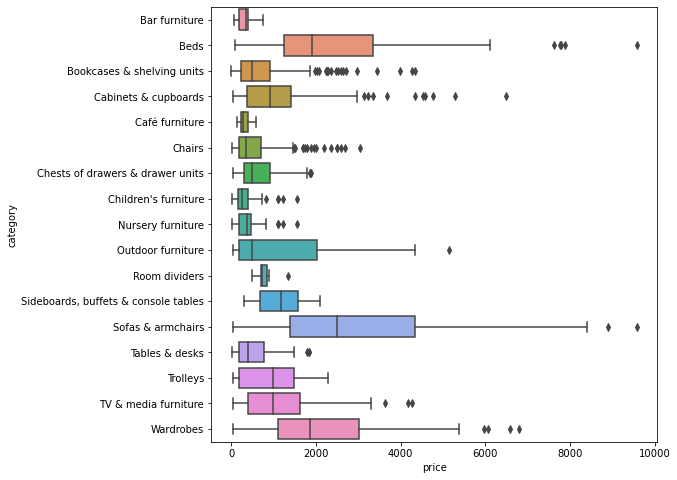

In [71]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df_0, x='price', y='category')
plt.show()

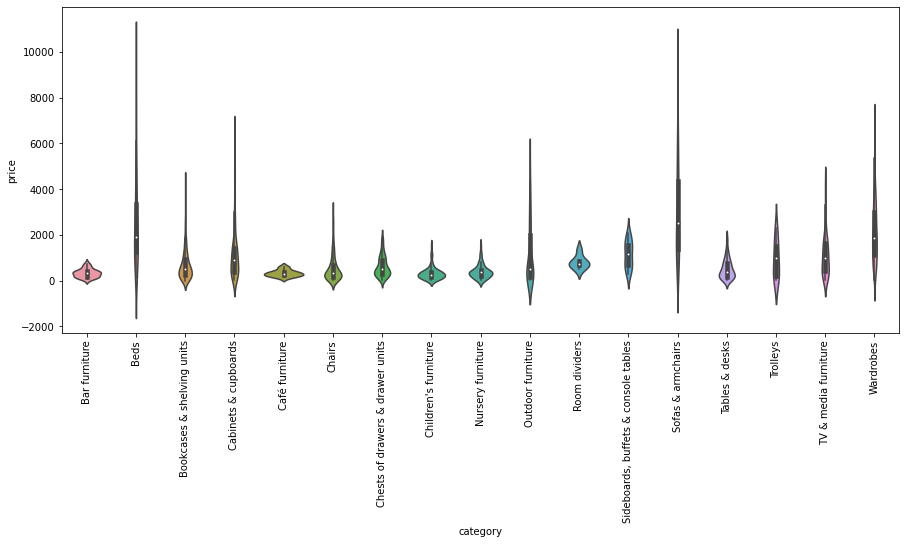

In [72]:
plt.subplots(figsize=(15,6))
sns.violinplot(data=df_0, y='price', x='category')
plt.xticks(rotation=90)
plt.show()

Як видно з гістограм, майже всі категорії мають викиди з боку максимальних цін.

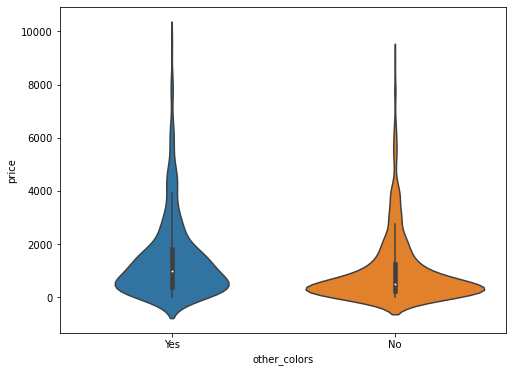

In [73]:
plt.subplots(figsize=(8,6))
sns.violinplot(data=df_0, y='price', x='other_colors')
plt.show()

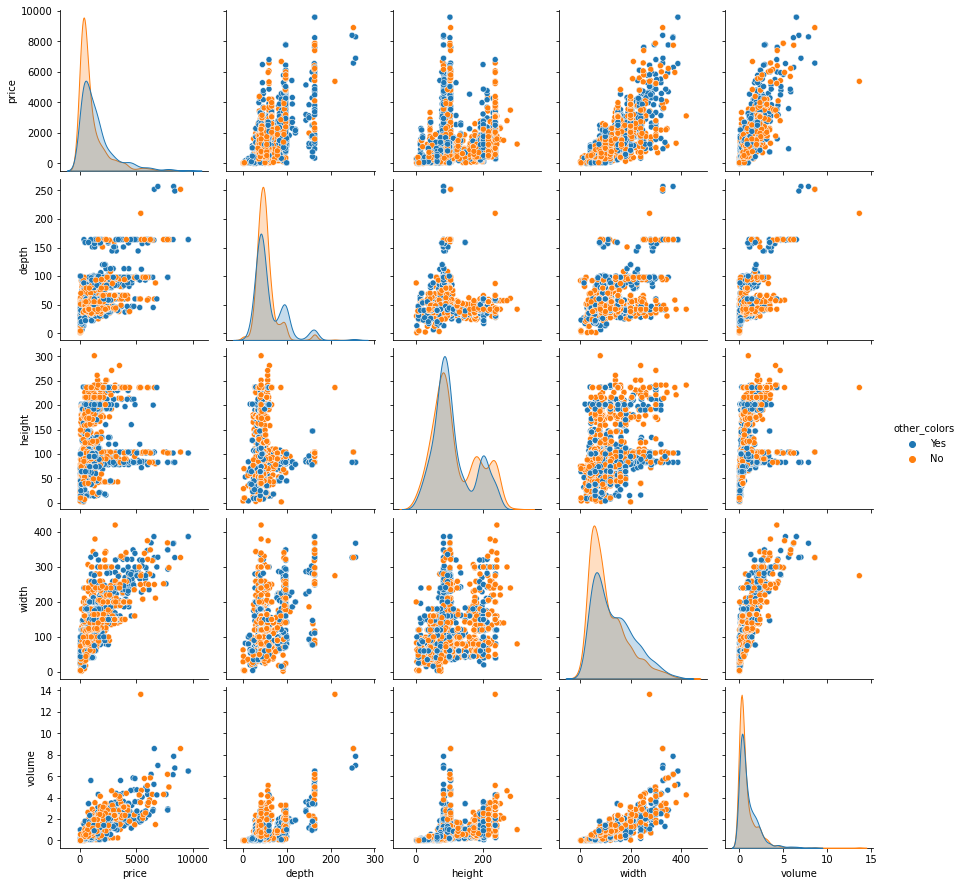

In [74]:
sns.pairplot(df_0[['price','depth','height','width','volume','other_colors','category']], hue='other_colors')

Схоже, ціни на товари, які мають кілька кольорів та ціни на одноколірні товари – мають однаковий розподіл.

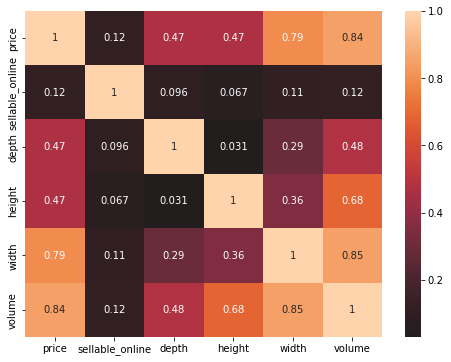

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df_0.corr(method='spearman'), xticklabels=df_0.corr().columns, yticklabels=df_0.corr().columns,\
            center=0, annot=True)
plt.show()

Простежується деяка кореляція між ціною та габаритами виробу, особливо об'ємом та шириною.

# 3. Перевірка гіпотез

## Гіпотеза №1

За гістограмою цін можна було припустити, що ціна має логнормальний розподіл. Якщо випадкова величина має логнормальний розподіл, її логарифм має нормальне розподіл. Побудуємо гістограму для логарифму цін та перевіримо гіпотезу H_0 про те, що ціни мають логнормальний розподіл.

0       2.423246
1       2.997823
2       3.321184
3       1.838849
4       2.352183
          ...   
3689    2.875061
3690    3.196453
3691    2.965672
3692    3.438542
3693    3.090258
Name: price, Length: 3694, dtype: float64


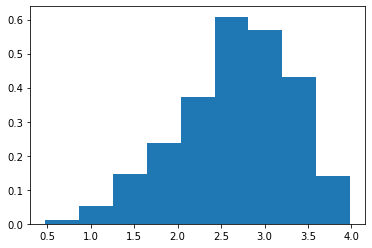

In [76]:
plt.hist(np.log10(df.price), bins=9,density=True)
print(np.log10(df.price))

0      -0.376554
1       0.513381
2       1.014219
3      -1.281697
4      -0.486620
          ...   
3689    0.323241
3690    0.821029
3691    0.463584
3692    1.195990
3693    0.656549
Name: price, Length: 3694, dtype: float64


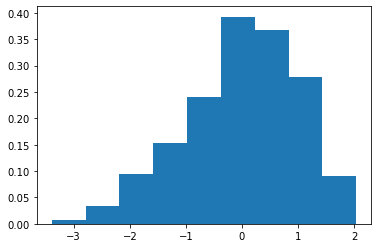

In [77]:
# стандартизація даних
sample_h = (np.log10(df.price)-np.log10(df.price).mean())/np.log10(df.price).std()
print(sample_h)
hist_h = plt.hist(sample_h, bins=9,density=True)

Використовуємо критерій Шапіро на різних даних та інші тести для перевірки гіпотези щодо нормальності розподілу.

In [78]:
h0_1_p_value = stats.shapiro(sample_h).pvalue
h0_1_p_value_1 = stats.shapiro(np.log10(df.price)).pvalue
h0_1_p_value_2 = stats.kstest(sample_h, cdf=stats.norm.cdf).pvalue
h0_1_p_value_3 = stats.normaltest(sample_h).pvalue
h0_1_p_value_4 = stats.ks_2samp(sample_h, stats.norm.rvs(size=len(sample_h))).pvalue
h0_1_p_value_5 = stats.mannwhitneyu(sample_h, stats.norm.rvs(size=len(sample_h))).pvalue

print(f'p-value:',h0_1_p_value,h0_1_p_value_1,h0_1_p_value_2,h0_1_p_value_3,h0_1_p_value_4,h0_1_p_value_5,
      sep="\n")

p-value:
5.4628254810538666e-24
5.417151223502475e-24
1.7777088115412767e-10
1.337202698503772e-32
0.002129557090245766
0.055026252977620496


Так як p-value дуже маленьке, то з великою часткою впевненості критерій Шапіро нашу нульову гіпотезу відкидає, хоча з гістограм цього не скажеш. Можливо, гістограми маю дуже мало кошиків. Збільшимо кількість кошиків до 50.

(array([0.01158702, 0.        , 0.        , 0.03089873, 0.01158702,
        0.        , 0.02703639, 0.03089873, 0.02317405, 0.13131961,
        0.07724683, 0.08497151, 0.05407278, 0.24332751, 0.18539239,
        0.22015346, 0.17380536, 0.18925473, 0.16994302, 0.21629112,
        0.12359492, 0.47120565, 0.11973258, 0.30512497, 0.36306009,
        0.6063876 , 0.34761073, 0.48665502, 0.41713287, 0.61024994,
        0.74156955, 0.61024994, 0.64887336, 0.57548887, 0.52527843,
        0.68749677, 0.43644458, 0.57548887, 0.61024994, 0.56776419,
        0.45961863, 0.47120565, 0.40940819, 0.30126263, 0.33988604,
        0.18925473, 0.16221834, 0.12359492, 0.06179746, 0.03862341]),
 array([0.47712125, 0.54721067, 0.61730009, 0.68738951, 0.75747892,
        0.82756834, 0.89765776, 0.96774718, 1.03783659, 1.10792601,
        1.17801543, 1.24810484, 1.31819426, 1.38828368, 1.4583731 ,
        1.52846251, 1.59855193, 1.66864135, 1.73873077, 1.80882018,
        1.8789096 , 1.94899902, 2.01908843, 2.

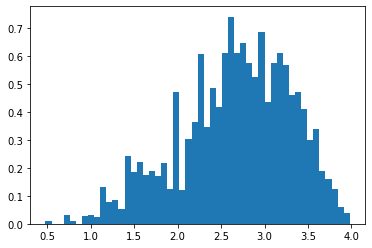

In [79]:
plt.hist(np.log10(df.price), bins=50,density=True)

Видно множинні викиди ліворуч і праворуч від купола. Гіпотеза про нормальний розподіл цін не підтвердилась.

## Гіпотеза №2

Перевіримо гіпотезу про те, що ціни на товари які мають кілька кольорів статистично не відрізняються від цін на однокольорові товари.

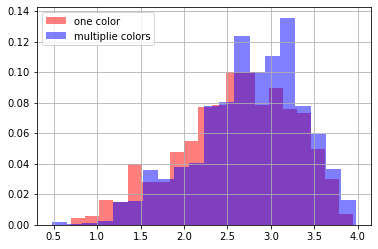

In [80]:
one_color = df[df['other_colors'] == 'No']['price'].apply(np.log10)
mult_color = df[df['other_colors'] == 'Yes']['price'].apply(np.log10)
one_color.name, mult_color.name = 'one color', 'multiplie colors'

one_color.hist(alpha=0.5, color='red', weights=[1./len(one_color)]*len(one_color), bins=20)
mult_color.hist(alpha=0.5, color='blue', weights=[1./len(mult_color)]*len(mult_color), bins=20)

plt.legend([one_color.name, mult_color.name])

Ми вже знаємо, що ціна не має нормального розподілу. Перевіримо критерій Манна-Уітні (він працює з не нормальним розподілом та непарними вибірками).

In [81]:
stats.mannwhitneyu(one_color, mult_color).pvalue

8.029293283507823e-12

p-value – менше 0.01, гіпотеза відкинута. Різниця цін багатобарвні і одноколірні товари статистично значуща. Так як розподіл цін не суттєво відрізняється від нормального обчислимо p-значення t-тесту Стьюдента.

In [82]:
stats.ttest_ind(one_color, mult_color, equal_var=False).pvalue

6.736250022293649e-13

Цей тест також підтверджує неспроможність нашої гіпотези.

# 4. Передбачення ціни на меблі

### Порадьте, які стовпці не слід включати у модель і чому.

Ми вже на першому етапі видалили стовпчики `item_id`, `link`.

`item_id`, `link` не потрібні оскільки є унікальними для кожного товару і ніяк не допоможуть спрогнозувати ціну товару.
`short_description` та `name` - Ці поля можна було б використовувати, наприклад, якщо опис містить слово "ексклюзивний", то ймовірно ціна буде вищою. Але ці колонки не дають жодної особливої ​​інформації і тому їх також можна видалити.

Можна видалити стовпчик `sellable_online`. Тому що вона не репрезентативна:
```
value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64
```
Також можна видалити стовпчик `old_price`. Так як 3040 позицій із 3694 (82,3%) не мають старої ціни, і ця колонка також малоінформативна:
```
value_counts()

No old price    3040

```

In [88]:
df = df.drop(['short_description', 'name', 'sellable_online', 'old_price'], axis=1)
df.columns

Index(['category', 'price', 'other_colors', 'designer', 'depth', 'height',
       'width', 'volume'],
      dtype='object')

### Створіть конвеєр перехресної перевірки для навчання та оцінки моделі, включаючи (за потреби) такі кроки як, внесення пропущених значень та нормалізація.

На етапі EDA ми виявили, що поля габаритів мають порожні значення. Їх можна заповнити медіанними значеннями за категорією. Також нам необхідно перевести категорійні змінні в цифровий вигляд. Можна закодувати категорії та дизайнерів середньою (медіана) ціною за категорією 

In [89]:
df["other_colors_1"] = df["other_colors"].map(dict(Yes=1, No=0))

#розрахуємо середнє значення кожного габариту у розрізі категорій
median_d = df.groupby(['category'])['depth'].median()
median_h = df.groupby(['category'])['height'].median()
median_w = df.groupby(['category'])['width'].median()

median_price = df.groupby(['category'])['price'].median()
median_dsgn = df.groupby(['designer'])['price'].median()

df = df.set_index(['category'])
df['depth_1'] = df['depth'].fillna(median_d)
df['height_1'] = df['height'].fillna(median_h)
df['width_1'] = df['width'].fillna(median_w)
df['category_median_price'] = median_price
df = df.reset_index()

df = df.set_index(['designer'])
df['designer_median_price'] = median_dsgn
df = df.reset_index()

df.head()

,designer,category,price,other_colors,depth,height,width,volume,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,265.0,No,NaN,99.0,51.0,NaN,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,995.0,No,NaN,105.0,80.0,NaN,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,2095.0,No,NaN,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,69.0,Yes,50.0,100.0,60.0,0.30000,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,225.0,No,60.0,43.0,74.0,0.19092,0,60.0,43.0,74.0,445.0,150.0


Для спрощення підбору параметрів вибірок та моделі створимо процедуру, яка прийматиме на вхід вибірки та розраховуватиме оцінки для різних регресорів

In [90]:
def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    #для кожної моделі зі списку
    for model in models:
        #отримуємо ім'я моделі
        m = str(model)
        tmp['Model'] = m[:m.index('(')]    
        #навчаємо модель
        model.fit(X_train, Y_train) 
        #обчислюємо R^2 - коефіцієнт детермінації
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        #обчислюємо MAE - середній модуль відхилення 
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        #обчислюємо RMSE - корінь із середнього квадрата відхилення
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        #записуємо дані та підсумковий DataFrame
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
    #робимо індекс за назвою моделі
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res


### Тест №1.

Візьмемо габарити розраховані за медіаною у розрізі категорій, категорії та дизайнери закодовані медіаною ціни. Перевіримо, який регресор покаже найкращий результат і як зміниться оцінка для моделі на основі дерева рішень.

In [92]:
X1 = df[['width_1','depth_1','height_1','category_median_price','designer_median_price','other_colors_1']]
Y1 = df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.82501,291.83707,580.77278
GradientBoostingRegressor,0.80402,361.03564,614.60519
DecisionTreeRegressor,0.73339,371.85337,716.85375
KNeighborsRegressor,0.71853,412.99372,736.56841
LassoCV,0.70334,466.79288,756.18479
RidgeCV,0.70267,475.64381,757.03399
LinearRegression,0.70264,475.79423,757.06748
SVR,0.68913,441.15670,774.07891


Найкращий результат показав RandomForestRegressor. R^2 = 0.82501

### Тест №2.

Видалимо всі рядки з незаповненими габаритами, категорії та дизайнери закодовані медіаною ціною.

In [93]:
df2 = df.dropna(subset=['width','height','depth'])
X2 = df2[['width','depth','height','category_median_price','designer_median_price','other_colors_1']]
Y2 = df2['price']

test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.87475,329.97955,585.70028
GradientBoostingRegressor,0.85894,365.84854,621.56079
DecisionTreeRegressor,0.84262,364.27376,656.53445
RidgeCV,0.76211,530.61838,807.18134
LinearRegression,0.76206,530.65681,807.26234
LassoCV,0.76133,528.64280,808.51379
SVR,0.71958,523.31435,876.37374
KNeighborsRegressor,0.69949,537.43745,907.21970


Оцінки `R^2` моделей покращилися. RandomForestRegressor - як і раніше показує найкращий результат.

Варто звернути увагу на те, що хоча оцінка 'R^2' покращилася, але при цьому середнє абсолютне відхилення MAE стало більше. Швидше за все, це результат того, що в першому випадку ми заповнили велику кількість порожніх значення середнім за категорією. Якщо у першому тесті у нас було 3694 значення, то у другому тесті, після видалення порожніх габаритів – всього 1899 значень. Тобто. Майже 48.5% рядків так чи інакше заповнені середнім значенням.

### Тест №3.

Видалимо всі рядки із незаповненими габаритами, замінимо колонки 'width', 'depth', 'height' на синтетичну колонку 'volume', категорії та дизайнери закодовані медіаною ціною.

In [96]:
X3 = df2[['volume','category_median_price','designer_median_price','other_colors_1']]
Y3 = df2['price']

test3 = getBestRegressor(X3, Y3)
test3['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.83114,373.55951,680.07086
GradientBoostingRegressor,0.82729,403.61967,687.76666
DecisionTreeRegressor,0.80389,410.52684,732.87807
LinearRegression,0.75016,498.88844,827.21269
RidgeCV,0.74948,499.54261,828.33407
KNeighborsRegressor,0.62800,615.97599,1009.37730
SVR,0.60364,579.01726,1041.90303
LassoCV,0.41705,768.84827,1263.56945


### Найкращі результати показав RandomForestRegressor на вибірках із Тест №2.



### Запропонуйте методи підвищення продуктивності моделі. Опишіть результати.

Скористаємось функцією GridSearchCV. Проведемо крос-валідацію та підберемо оптимальні параметри для RandomForestRegressor

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Estimator : RandomForestRegressor(max_depth=100, max_features='sqrt')
Best Score     : 0.8680701179863493

R^2            : 0.87184
MAE            : 331.26611
RMSE           : 592.46644

Feature importance:
--------------------------------
0.42775    width
0.18387    depth
0.09465    height
0.12626    category_median_price
0.15326    designer_median_price
0.01422    other_colors_1


<AxesSubplot:>

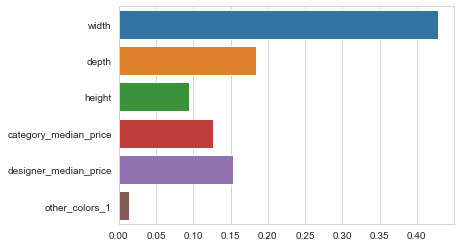

In [97]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,100,200,None], 'max_features': 
                                                     ['auto','sqrt','log2']},cv=5, n_jobs=-1, verbose=3)

forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

<AxesSubplot:xlabel='price'>

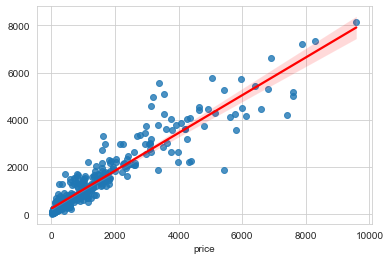

In [98]:
sns.regplot(x=Y_test, y=forest_grid.predict(X_test),line_kws={'color':'red'})

Для покращення якості моделі необхідно покращувати якість даних.

Можна спробувати витягти габарити, що бракують, з опису товару.

Як видно з таблиці та графіка важливості змінних (feature importance) "дизайнери" роблять досить великий внесок. Можна поекспериментувати із кодуванням дизайнерів.